## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_datareader.data as pdrd
import pandas as pd

In [ ]:
start = '2017-01-01'
end = '2018-12-31'
aapl_price = pdrd.DataReader(name = 'AAPL', data_source = 'yahoo', start = start, end = end)
aapl_price

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
import numpy as np
import pandas as pd
data = np.load('average_ratings.npy')
ratings_df = pd.DataFrame(data.T, columns=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'])    #T= транспонирование
ratings_df

,waffle iron french toast,zwetschgenkuchen bavarian plum cake,lime tea
0,5.000000,7.000000,3.000000
1,5.013103,6.970750,2.996861
2,5.026240,7.000000,2.993725
3,5.013103,6.970750,2.996861
4,5.000000,6.941621,3.000000
...,...,...,...
1090,5.493987,10.000000,2.987464
1091,5.508384,10.000000,2.990593
1092,5.522819,10.000000,2.993725
1093,5.537292,10.000000,2.990593


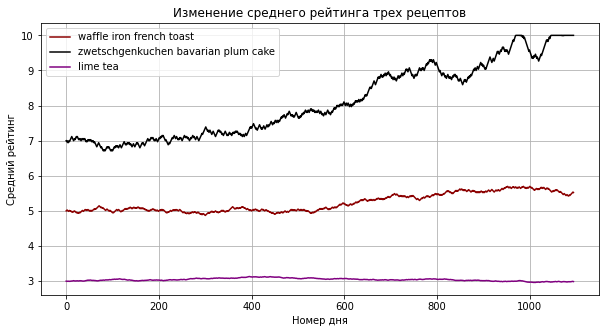

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
x = list(ratings_df.index.values)
y_0 = ratings_df['waffle iron french toast']
y_1 = ratings_df['zwetschgenkuchen bavarian plum cake']
y_2 = ratings_df['lime tea']
plt.plot(x, y_0, color='darkred', label='waffle iron french toast')
plt.plot(x, y_1, color='black', label='zwetschgenkuchen bavarian plum cake')
plt.plot(x, y_2, color='purple', label='lime tea')
plt.legend()
plt.grid()
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [ ]:
from datetime import datetime
def convert_time(mytime):
   
    try:
        mytime = str(mytime).split(".")[0]
    except ValueError:
        print("Not able to split.")

    mytime = str(mytime).split(" ")[0] + " " + str(mytime).split(" ")[1]

    return mytime

In [ ]:
dates_df = pd.date_range(start='2019-01-01', end='2021-12-30', periods=1095)
dates_str_list = [convert_time(x) for x in list(map(str, dates_df))]
dates = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dates_str_list]

ratings_df = pd.DataFrame(data.T, columns=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'])
ratings_df.index = dates

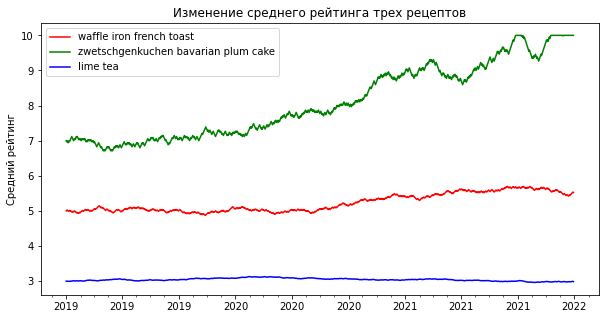

In [ ]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

x = list(ratings_df.index.values)
y_0 = ratings_df['waffle iron french toast']
y_1 = ratings_df['zwetschgenkuchen bavarian plum cake']
y_2 = ratings_df['lime tea']

ax.plot(x, y_0, color='r', label='waffle iron french toast')
ax.plot(x, y_1, color='g', label='zwetschgenkuchen bavarian plum cake')
ax.plot(x, y_2, color='b', label='lime tea')
ax.legend()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')


plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

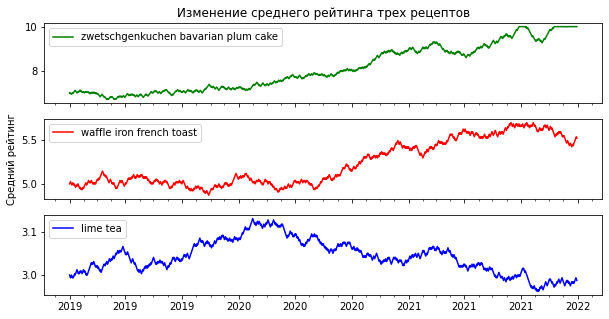

In [ ]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(10, 5))

x = list(ratings_df.index.values)
y_0 = ratings_df['waffle iron french toast']
y_1 = ratings_df['zwetschgenkuchen bavarian plum cake']
y_2 = ratings_df['lime tea']

ax0 = plt.subplot(312)
ax0.plot(x, y_0, color='r', label='waffle iron french toast')
ax1 = plt.subplot(311)
ax1.plot(x, y_1, color='g', label='zwetschgenkuchen bavarian plum cake')
ax2 = plt.subplot(313)
ax2.plot(x, y_2, color='b', label='lime tea')
ax0.get_shared_x_axes().join(ax0, ax1, ax2)

ax0.get_shared_x_axes().join(ax0, ax1, ax2)
ax1.get_shared_x_axes().join(ax0, ax1, ax2)
ax0.set_xticklabels([])
ax1.set_xticklabels([])

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax0.xaxis.set_minor_locator(mdates.MonthLocator())

ax0.set_ylabel('Средний рейтинг')
ax1.set_title('Изменение среднего рейтинга трех рецептов')
ax0.legend()
ax1.legend()
ax2.legend(loc='upper left')
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [ ]:
data = np.load('visitors.npy')
visitors_df = pd.DataFrame(data);visitors_df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2311,2023,1839,1523,1371,1217,1098,958,862,724,...,2,2,2,2,2,2,2,2,2,2


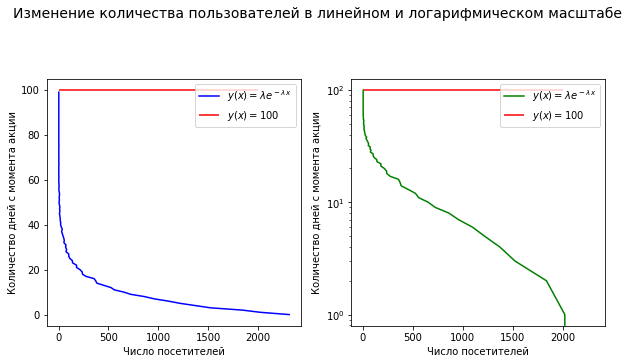

In [ ]:
y = list(visitors_df.index.values)
x_0 = list(visitors_df[0])
fig = plt.figure(figsize=(10, 10))

ax0 = plt.subplot(221)
ax1 = plt.subplot(222)

ax0.plot(x_0, y, color='b', label=r'$y(x)=\lambda e ^-$$^\lambda$$^x$')
ax0.hlines(100, 0, 2000, color='r', label=r'$y(x)=100$')
ax0.set_xlabel('Число посетителей')
ax0.set_ylabel('Количество дней с момента акции')
ax0.legend(loc='upper right')


ax1.plot(x_0, y, color='g', label=r'$y(x)=\lambda e ^-$$^\lambda$$^x$')
ax1.hlines(100, 0, 2000, color='r', label=r'$y(x)=100$')
plt.yscale('log')
ax1.set_xlabel('Число посетителей')
ax1.set_ylabel('Количество дней с момента акции')
ax1.legend(loc='upper right')

plt.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize=14)
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv', index_col='Unnamed: 0')

In [ ]:
reviews

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [ ]:
recipes


,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
short_rec, med_rec, long_rec = 0, 0, 0
short_steps,med_steps, long_steps = [], [], []
for i in range(len(recipes)):
    if recipes['minutes'][i] < 5:
        short_rec += 1
        if not pd.isna(recipes['n_steps'][i]):     #является ли   nan 
            short_steps.append(recipes['n_steps'][i])
    elif 5 <= recipes['minutes'][i] < 50:
        med_rec +=1
        if not pd.isna(recipes['n_steps'][i]):
            med_steps.append(recipes['n_steps'][i])
    elif recipes['minutes'][i] >= 50:
        long_rec += 1
        if not pd.isna(recipes['n_steps'][i]):
            long_steps.append(recipes['n_steps'][i])

x = [short_rec, med_rec, long_rec]
y = [np.mean(short_steps),np.mean(med_steps),np.mean(long_steps)]

Text(0.5, 1.0, 'Размеры групп рецептов')

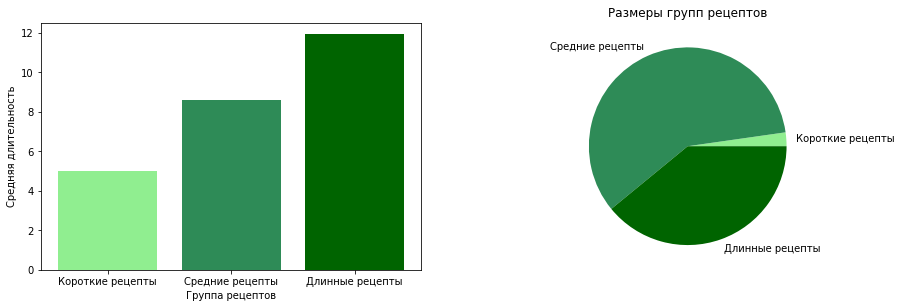

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax0 = plt.subplot(221)
ax1 = plt.subplot(222)

ax0.bar(['Короткие рецепты','Средние рецепты','Длинные рецепты'], y, color=['lightgreen', 'seagreen', 'darkgreen']) 
ax0.set_xlabel('Группа рецептов')
ax0.set_ylabel('Средняя длительность')
ax1.pie(x, labels=['Короткие рецепты','Средние рецепты','Длинные рецепты'], colors=['lightgreen', 'seagreen', 'darkgreen'])
ax1.set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [ ]:
rating_2008, rating_2009 = [], []
rating_text_2008, rating_text_2009 = [], []
for i in range(len(recipes)):
    if str(recipes['submitted'][i])[:4] == '2008':
        try:
            rating_2008.append(reviews['rating'][recipes['id'][i]])
            rating_text_2008.append(reviews['recipe_id'][recipes['id'][i]])
        except KeyError:
            pass
    elif str(recipes['submitted'][i])[:4] == '2009':
        try:
            rating_2009.append(reviews['rating'][recipes['id'][i]])
            rating_text_2009.append(reviews['recipe_id'][recipes['id'][i]])
        except KeyError:
            pass

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

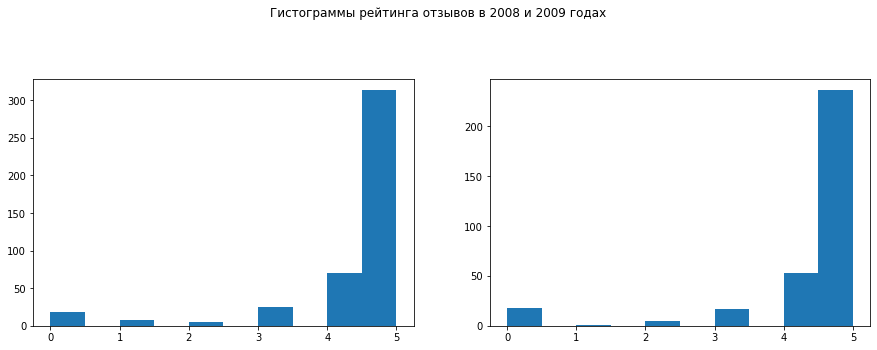

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax0 = plt.subplot(221)
ax1 = plt.subplot(222)

ax0.hist(rating_2008)
ax1.hist(rating_2009)

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [ ]:
import seaborn as sns     #для продвинутых диаграмм


In [ ]:
recipes['category'] = np.nan
for i in range(len(recipes)):
    if recipes['minutes'][i] < 5:
        recipes['category'][i] = 'short'
    elif 5 <= recipes['minutes'][i] < 50:
        recipes['category'][i] = 'medium'
    elif recipes['minutes'][i] >= 50:
        recipes['category'][i] = 'long'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

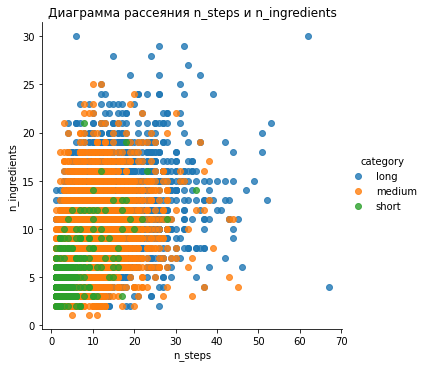

In [ ]:
sns.lmplot(x ='n_steps', y ='n_ingredients',       #hue для каждой категории свой цвет
          fit_reg = False, hue = 'category',
          data = recipes)
ax = plt.gca()
ax.set_title('Диаграмма рассеяния n_steps и n_ingredients')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [ ]:
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv', index_col='Unnamed: 0')

df = pd.merge(recipes, reviews, left_on = "id",right_on = "recipe_id")
df.drop(['name', 'id', 'contributor_id', 'submitted','description', 'user_id', 'recipe_id', 'date', 'review'], axis = 1,inplace=True)

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

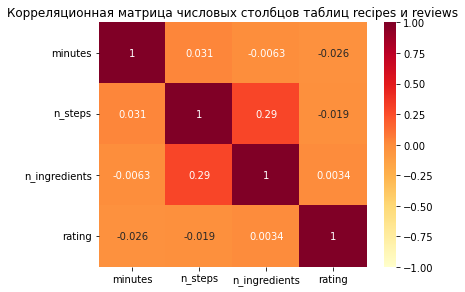

In [ ]:
# df = new_df.pivot(columns=["minutes", "n_steps", "n_ingredients", "rating"])
corr = df[df.columns].apply(lambda x: df[df.columns].corrwith(x))     #корреляция с

ax = sns.heatmap(corr, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
ax.tick_params(labelrotation=0)
plt.tight_layout()

ax = plt.gca()
ax.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')